# IML Assignment 1

## Name: Evgeny Bobkunov


## Mail: e.bobkunov@innopolis.university


## Group: SD-03

## Task 1

### 3.1. Linear Regression
#### Data reading

In [20]:
import pandas as pd

df = pd.read_csv("train_1.csv")
# Drop the first column (index column)
df = df.drop(columns=['Unnamed: 0'])

#### Train\validation splitting

In [21]:
from sklearn.model_selection import train_test_split

X = df[['X_1', 'X_2', 'X_3', 'X_4']]  # Features
y = df['y']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Linear regression model fitting

In [22]:
from sklearn.linear_model import LinearRegression


# Declare and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prediction by model on the validation set
y_pred_lr = linear_model.predict(X_test)

#### Linear regression model prediction & Evaluation


In [23]:
from sklearn import metrics

# Print MSE, RMSE, MAE and R2 score
def print_metrics(y_actual, y_pred):
    mse = metrics.mean_squared_error(y_actual, y_pred)
    rmse = metrics.root_mean_squared_error(y_actual, y_pred)
    mae = metrics.mean_absolute_error(y_actual, y_pred)
    r2 = metrics.r2_score(y_actual, y_pred)
    
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R2) Score:", r2)


print_metrics(y_test, y_pred_lr)

Mean Squared Error (MSE): 5952.769026599828
Root Mean Squared Error (RMSE): 77.15418994843914
Mean Absolute Error (MAE): 65.63038354038142
R-squared (R2) Score: 0.8386837490518894


### 3. 2 Polynomial Regression
#### Constructing the polynomial regression pipeline

In [24]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [25]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

#### Tuning the degree hyper-parameter using GridSearch

In [26]:
from sklearn.model_selection import GridSearchCV

degrees = range(2, 6)
param_grid = {'poly__degree': degrees}
search = GridSearchCV(pipeline, param_grid, cv=8, scoring='neg_mean_squared_error')
search.fit(X_train, y_train)


best_degree = search.best_params_['poly__degree']
print(f"Best parameter: {best_degree}")
print(f"Search score: {search.best_score_}")

Best parameter: 4
Search score: -0.4432606498092242


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions on the test set using the best model
best_model = search.best_estimator_
y_pred_poly = best_model.predict(X_test)

# Evaluation metrics
def print_metrics(y_actual, y_pred):
    mse = mean_squared_error(y_actual, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_actual, y_pred)
    r2 = r2_score(y_actual, y_pred)
    
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R2) Score:", r2)

print_metrics(y_test, y_pred_poly)

Mean Squared Error (MSE): 0.1793550388080882
Root Mean Squared Error (RMSE): 0.4235032925587335
Mean Absolute Error (MAE): 0.33334851874508387
R-squared (R2) Score: 0.99999513959263


#### Save the model

In [28]:
import pickle 

# Save the GridSearch model for evaluation
filename = 'poly_optimized_model.sav'
pickle.dump(search, open(filename, 'wb'))

### 3.3 Determine the linear dependent features

Use the following code cell to determine a pair of features from the training dataset that are correlated to each other. Explain your choise in the markdown cell.

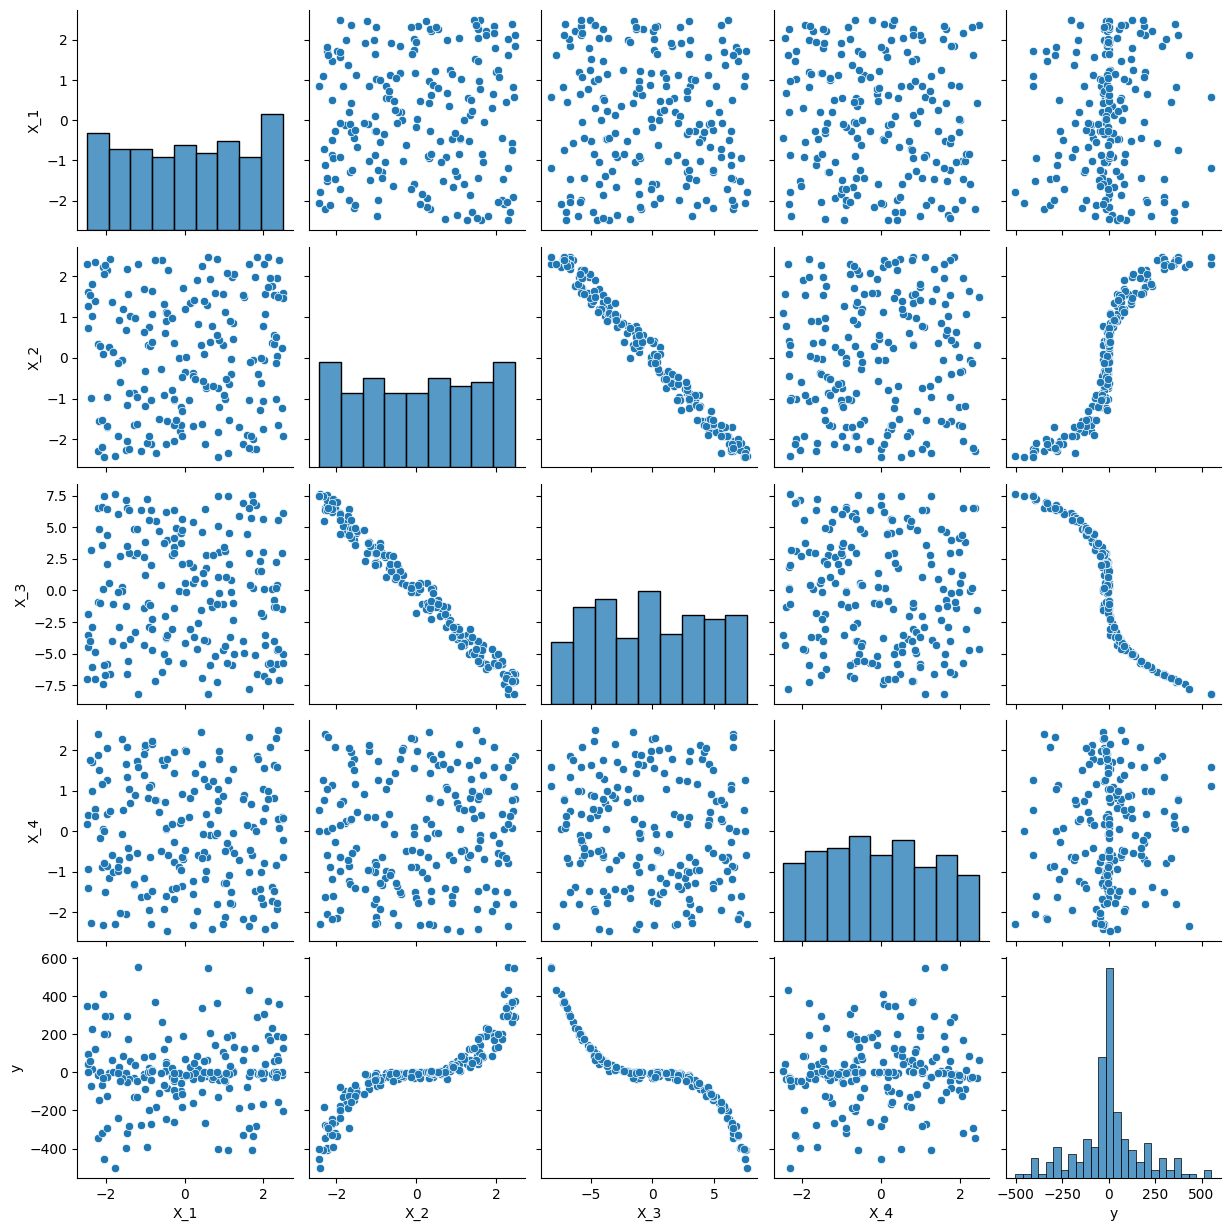

          X_1       X_2       X_3       X_4         y
X_1  1.000000  0.050619 -0.050423 -0.079243  0.067928
X_2  0.050619  1.000000 -0.990740  0.079970  0.893795
X_3 -0.050423 -0.990740  1.000000 -0.095827 -0.911165
X_4 -0.079243  0.079970 -0.095827  1.000000  0.087708
y    0.067928  0.893795 -0.911165  0.087708  1.000000


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

correlation_matrix = df.corr()
print(correlation_matrix)


Feature X_2 has a strong positive correlation with target variable y, while feature X_3 has a strong negative correlation with target variable y. The correlation between X_2 and X_3 is also strong, linear and negative. This means that X_2 and X_3 are linearly dependent.

## Task 2

### 4.1 Data processing
#### Loading the dataset

In [53]:
import pandas as pd

df = pd.read_csv('pokemon_modified.csv')

#### Exploring the dataset  and removing 2 redundant features

In [54]:
print(df.head())
print(df.info())

redundant_features = ['name', 'classification']  # These features are unlikely to contribute to classification
df.drop(columns=redundant_features, inplace=True)

   against_bug  against_dark  against_dragon  against_electric  against_fairy  \
0          1.0           1.0             1.0               0.5            0.5   
1          1.0           1.0             1.0               0.5            0.5   
2          1.0           1.0             1.0               0.5            0.5   
3          0.5           1.0             1.0               1.0            0.5   
4          0.5           1.0             1.0               1.0            0.5   

   against_fight  against_fire  against_flying  against_ghost  against_grass  \
0            0.5           2.0             2.0            1.0           0.25   
1            0.5           2.0             2.0            1.0           0.25   
2            0.5           2.0             2.0            1.0           0.25   
3            1.0           0.5             1.0            1.0           0.50   
4            1.0           0.5             1.0            1.0           0.50   

   ...  hp        name  percenta

#### Splitting the data
Use random_state = 123, stratify, and set test_size = 0.2

In [55]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['is_legendary'])
y = df['is_legendary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

Check if the dataset is balanced or not and comment on it

In [56]:
print("Class distribution in the training set:")
print(y_train.value_counts(normalize=True))
print("Class distribution in the test set:")
print(y_test.value_counts(normalize=True))

Class distribution in the training set:
is_legendary
0    0.9125
1    0.0875
Name: proportion, dtype: float64
Class distribution in the test set:
is_legendary
0    0.913043
1    0.086957
Name: proportion, dtype: float64


The dataset is imbalanced because the class distribution is skewed towards non-legendary Pokemon.

#### Checking for missing values and imputing the missing values

In [57]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

#### Double check that there are no missing values

In [58]:
print(pd.DataFrame(X_train_imputed).isnull().sum())
print(pd.DataFrame(X_test_imputed).isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
dtype: int64


#### Encode categorically

In [59]:
# Define your data
data = df[['type1']]  # Assuming 'type1' is the categorical feature in your dataset

# Use OneHotEncoder to perform one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
onehot = encoder.fit_transform(data)

# Convert the transformed data back into a DataFrame
encoded_df = pd.DataFrame(onehot, columns=encoder.get_feature_names_out(data.columns))

print(encoded_df)

     type1_bug  type1_dark  type1_dragon  type1_electric  type1_fairy  \
0          0.0         0.0           0.0             0.0          0.0   
1          0.0         0.0           0.0             0.0          0.0   
2          0.0         0.0           0.0             0.0          0.0   
3          0.0         0.0           0.0             0.0          0.0   
4          0.0         0.0           0.0             0.0          0.0   
..         ...         ...           ...             ...          ...   
796        0.0         0.0           0.0             0.0          0.0   
797        0.0         0.0           0.0             0.0          0.0   
798        0.0         1.0           0.0             0.0          0.0   
799        0.0         0.0           0.0             0.0          0.0   
800        0.0         0.0           0.0             0.0          0.0   

     type1_fighting  type1_fire  type1_ghost  type1_grass  type1_ground  \
0               0.0         0.0          0.0    

#### Scale the data

In [61]:
# Define your dataset
from sklearn.preprocessing import MinMaxScaler


data_to_scale = df[['attack', 'defense', 'speed', 'weight_kg']]  # Assuming these are the numerical features to scale

# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Convert the scaled data back into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data_to_scale.columns, index=df.index)

print(scaled_df)

       attack   defense     speed  weight_kg
0    0.244444  0.195556  0.228571   0.006801
1    0.316667  0.257778  0.314286   0.012903
2    0.527778  0.524444  0.428571   0.099920
3    0.261111  0.168889  0.342857   0.008402
4    0.327778  0.235556  0.428571   0.018904
..        ...       ...       ...        ...
796  0.533333  0.435556  0.320000   1.000000
797  0.977778  0.560000  0.594286   0.000000
798  0.533333  0.213333  0.217143   0.888078
799  0.566667  0.426667  0.422857   0.229946
800  0.500000  0.488889  0.342857   0.080416

[801 rows x 4 columns]


#### <span style="color:red">Correlation matrix</span>

Are there highly co-related features in the dataset? Is it a problem? Explain in the markdown cell.

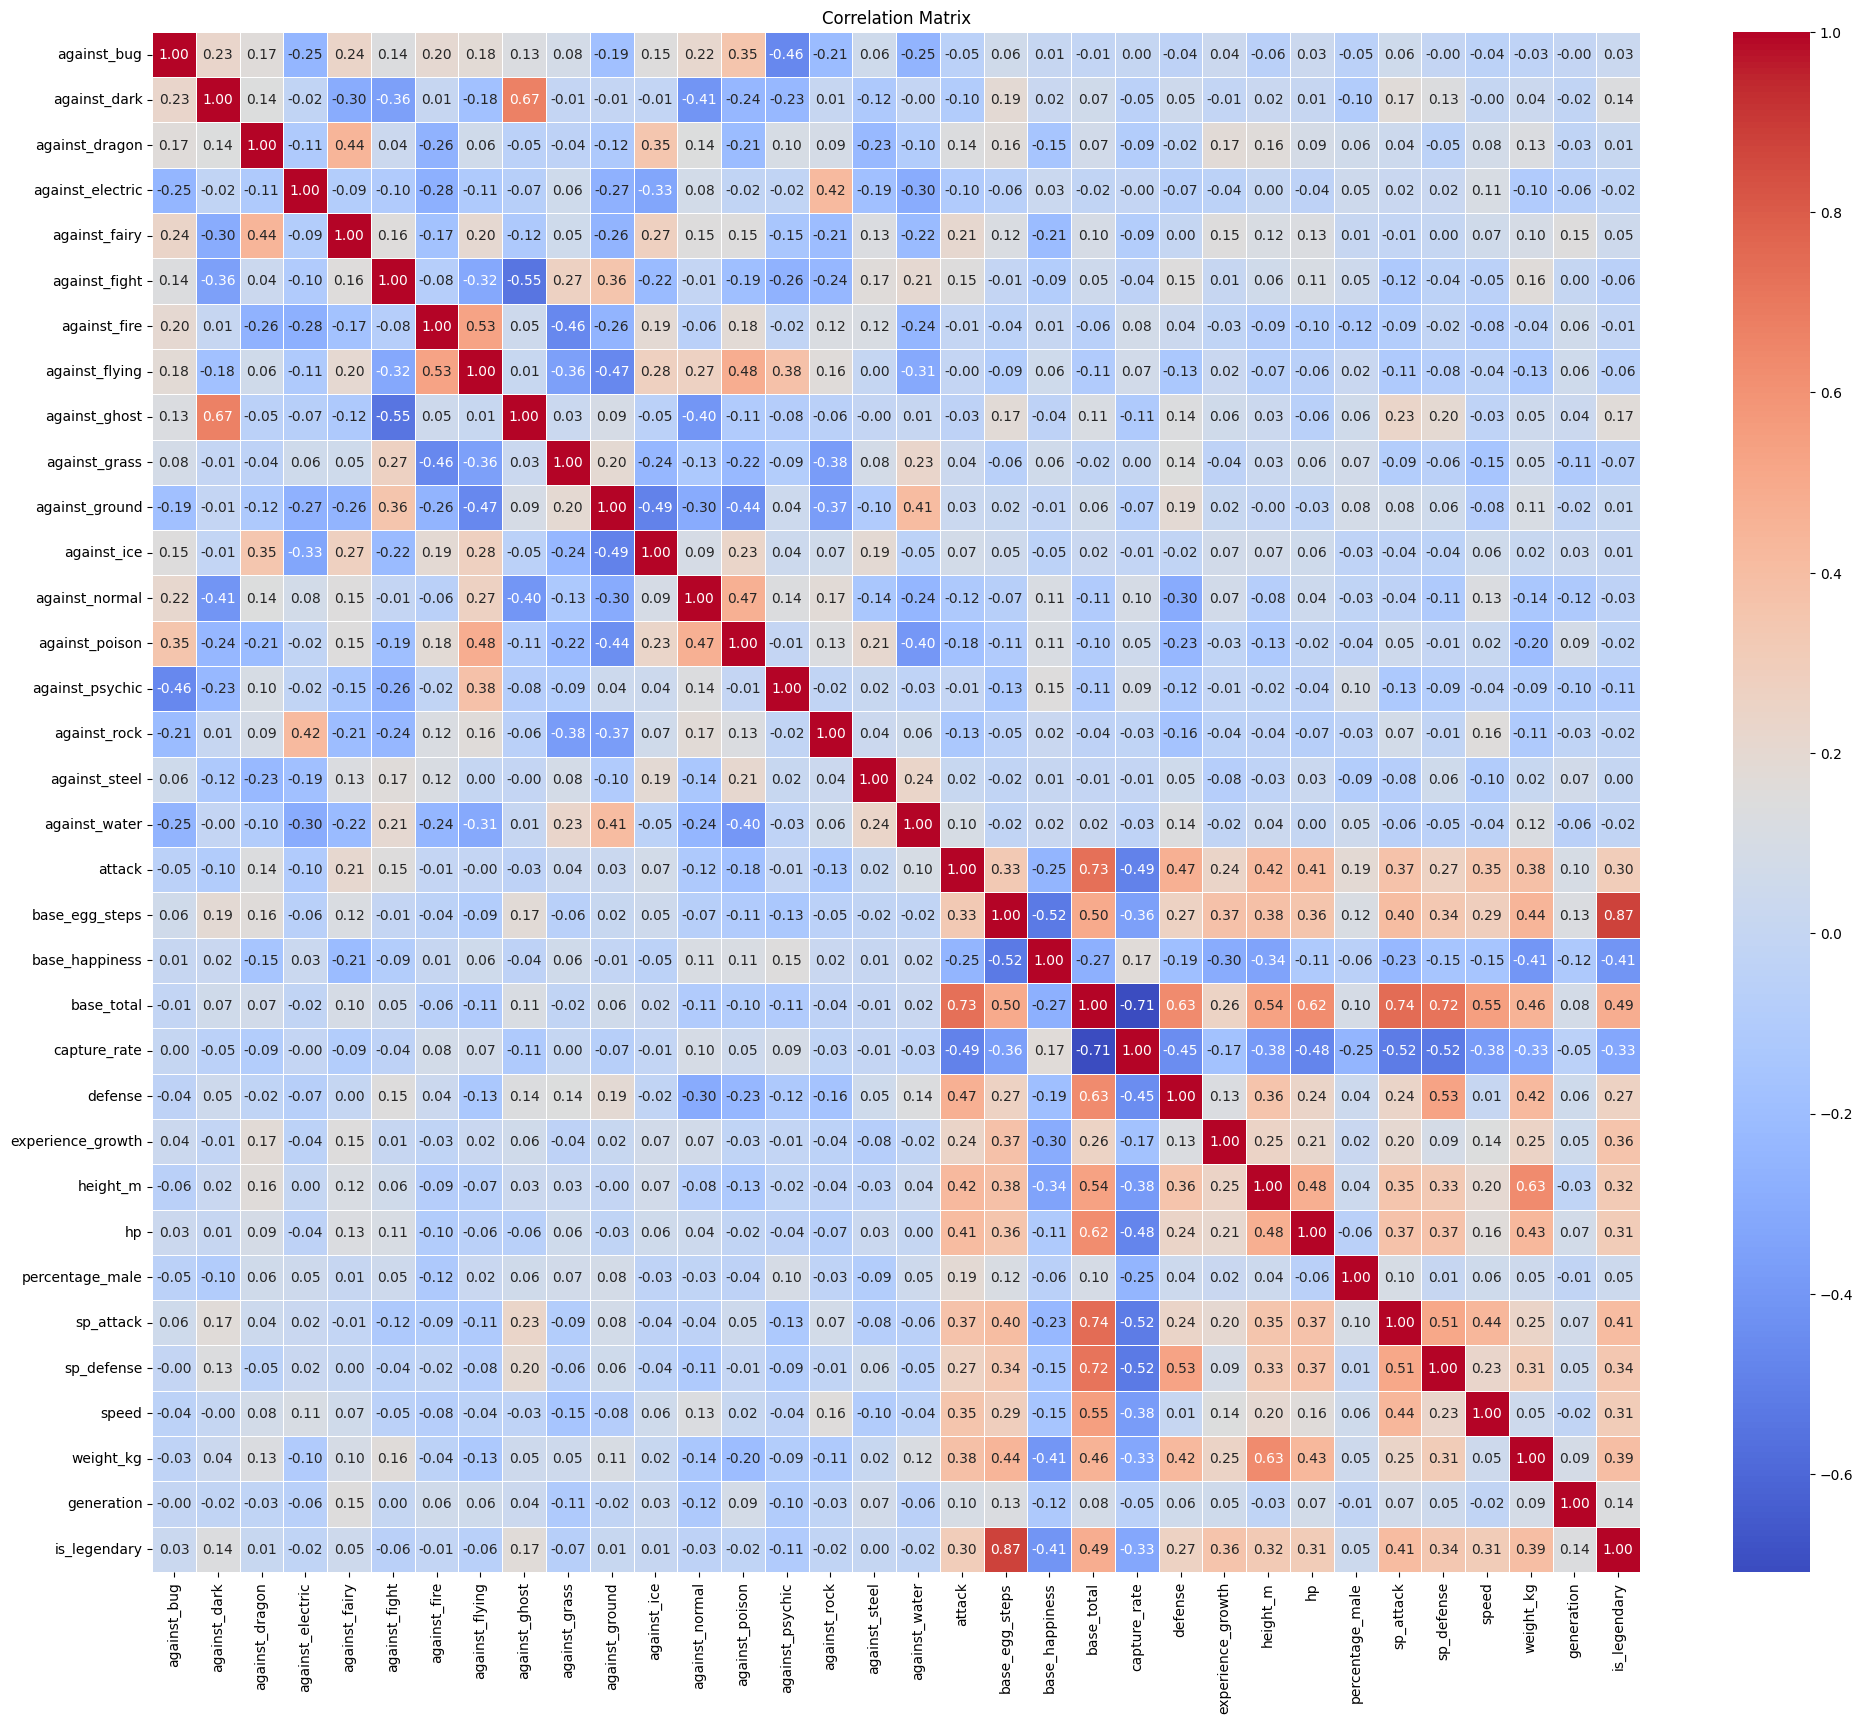

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns before computing correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### 4.2 Model fitting and Comparison

#### Tuning LR model

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Caclulate and print classification metrics: accuracy, precision, recall, and F1 score 
    
def print_clf_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

In [68]:
# Specify GridSearchCV as in intruction
parameters = {'penalty': ['l1', 'l2'],
              'C': np.logspace(-3, 3, 7),
              'solver': ['newton-cg', 'lbfgs', 'liblinear']}
lr_clf_gs = GridSearchCV(LogisticRegression(max_iter=1000), parameters, scoring='f1')
lr_clf_gs.fit(X_train_encoded, y_train)

print("Tuned Hyperparameters :", lr_clf_gs.best_params_)
print("Best Score:", lr_clf_gs.best_score_)

Tuned Hyperparameters : {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.9627329192546584


c:\Users\eugen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\eugen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\eugen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\eugen\AppDa

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Declare and train logistic regression inside GridSearchCV with the parameters above

lr_clf = lr_clf_gs.best_estimator_
lr_y_pred = lr_clf.predict(X_test_encoded)
print("Logistic Regression Metrics:")
print_clf_metrics(y_test, lr_y_pred)

Logistic Regression Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [71]:
print("Tuned Hyperparameters :",)
print("Accuracy :",)

Tuned Hyperparameters :
Accuracy :


#### Construct a LR with the best params and Evaluate the LR with the best params

In [43]:
# TODO Write your code here
lr_clf = ...
lr_y_pred = ...

In [72]:
print_clf_metrics(y_test, lr_y_pred)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


#### Print the top 5 most influencing features and the top 5 ignored features

#### Tuning KNN model

In [46]:
from sklearn.neighbors import KNeighborsClassifier

# Declare and train knn inside GridSearchCV
# TODO Write your code here
param_grid = ...
knn_clf_gs = ...


print("Tuned Hyperparameters :", )
print("Accuracy :",)

Tuned Hyperparameters :
Accuracy :


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [47]:
# TODO Write your code here
knn_clf = ...
knn_y_pred = ...
print_clf_metrics(y_test, knn_y_pred)

#### Fitting GNB to the data and evaluating on the test dataset

In [48]:
from sklearn.naive_bayes import GaussianNB

# Declare and train GaussianNB. No hyperparameters tuning 
# TODO Write your code here
gauss_nb_clf = ...
gauss_y_pred = ...

print_clf_metrics(y_test, gauss_y_pred)

#### Which metric is most appropriate for this task and why?

#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? Explain

In [49]:
# TODO Write your code here

## 5. Bonus Task

#### Loading the Dataset

In [50]:
import pandas as pd

# TODO Write your code here
train_data = ...

test_data = ...

In [51]:
# Split the data
# TODO Write your code here
X_train, X_test, y_train, y_test = ...
print(X_train, y_train, X_test, y_test)

TypeError: cannot unpack non-iterable ellipsis object

####  Plot the data using the pairplot in sns

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# TODO Write your code here

#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [ ]:
# TODO Write your code here
ovr_lr = ...

#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [ ]:
# TODO Write your code here
multi_lr = ...

#### Using gridsearch to tune the C value and multi class

In [ ]:
# TODO Write your code here
params = ...
grid_search_clf = ...

In [ ]:
print("Tuned Hyperparameters :")
print("Accuracy :")

#### Comment on why one multi_class technique was better than the other

#### Create LR with the best params

In [ ]:
# TODO Write your code here
multi_lr = ... 

#### Visualize the decision boundaries

In [ ]:
from mlxtend.plotting import plot_decision_regions
# TODO Write your code here
multi_lr = ...

plot_decision_regions()

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression decision boundary)
plt.show()

#### Comment on the decision boundary, do you think this is a good model or not? and based on what?